In [1]:
# assert df.ScheduledDay.isnull().sum() == 0, ‘missing ScheduledDay dates’

In [2]:
# step 1: Problem definition

In [1]:
# Step 2: Collection of data points into data frame

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# filer = ['.\zindi\Comments.csv', '.\zindi\Submissions.csv', '.\zindi\CompetitionPartipation.csv', '.\zindi\Competitions.csv', 
#                                  '.\zindi\Discussions.csv', ]
# frames = [pd.read_csv(f) for f in filer]
# result = pd.concat(frames)

In [5]:
# zindi-user-behaviour-birthday-challenge

# Training dataset
df = pd.read_csv('.\zindi\Train.csv')
X = df.drop('Target', axis=1)
# X_train = features.values
Xtr_train = X.values
ytr_train = df['Target'].values
# y_train = target.values


# Ideal dataset
df_1 = pd.read_csv('.\zindi\Comments.csv')
df_2 = pd.read_csv('.\zindi\CompetitionPartipation.csv')
df_3 = pd.read_csv('.\zindi\Competitions.csv')
df_4 = pd.read_csv('.\zindi\Discussions.csv')
df_5 = pd.read_csv('.\zindi\Submissions.csv')


# df_4a = ((df_1.merge(df_2)).merge(df_3)).merge(df_4)
# df_all = df_4a.merge(df_5)

# Sample Submisssion dataset
df_S = pd.read_csv('.\zindi\SampleSubmission.csv')

# Test dataset
df_test = pd.read_csv('.\zindi\Test.csv')
X = df_test.drop('User_ID', axis=1)
Xt_test = X.values
df_test['target'] = df_S['Target']
yt_test = df_test['target']


In [6]:
ytr = df['Target'].value_counts()
ytr
X.value_counts()
X

,month,year
0,1,4
1,2,4
2,3,4
3,1,4
4,2,4
...,...,...
65218,3,4
65219,3,4
65220,3,4
65221,3,4


In [7]:
help(df_1.replace)

Help on method replace in module pandas.core.frame:

replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad') method of pandas.core.frame.DataFrame instance
    Replace values given in `to_replace` with `value`.
    
    Values of the DataFrame are replaced with other values dynamically.
    This differs from updating with ``.loc`` or ``.iloc``, which require
    you to specify a location to update with some value.
    
    Parameters
    ----------
    to_replace : str, regex, list, dict, Series, int, float, or None
        How to find the values that will be replaced.
    
        * numeric, str or regex:
    
            - numeric: numeric values equal to `to_replace` will be
              replaced with `value`
            - str: string exactly matching `to_replace` will be replaced
              with `value`
            - regex: regexs matching `to_replace` will be replaced with
              `value`
    
        * list of str, regex, or numeric:
 

In [8]:
merged = pd.merge(df_1, df_2, how='outer', left_on='UserID', right_on='UserID', sort=True)

In [9]:
merged1 = pd.merge(merged, df_3, how='outer', left_on='CompID', right_on='CompID', sort=True)

In [10]:
merged2 = pd.merge(merged1, df_4, how='outer', left_on='UserID', right_on='UserID', sort=True)

In [11]:
df_all = pd.DataFrame.drop_duplicates(merged2, subset=['UserID'], keep = 'first', inplace = False)

In [12]:
df_asa = pd.merge(df_all, df_5, how='outer', left_on='UserID', right_on='UserID', sort=True)

In [13]:
df_asa = pd.DataFrame.drop_duplicates(df_asa, subset=['UserID'], keep = 'first', inplace = False)

In [14]:
df_asa.head(10)

,UserID,CommentDate Year,CommentDate Month,CommentDate Day_of_week,CompID_x,PublicRank,Successful Submission Count,CompPartCreated Year,CompPartCreated Month,CompPartCreated Day_of_week,...,FeatureF,DiscDate Year,DiscDate Month,DiscDate Day_of_week,DiscID,FeatureG,CompID_y,SubDate Year,SubDate Month,SubDate Day_of_week
0,ID_000VV0KM,NaN,NaN,NaN,ID_F53H,rank 8,count 10,2.0,12.0,3.0,...,NaN,NaN,NaN,NaN,NaN,0.0,ID_F53H,2.0,12.0,3.0
7,ID_004U5SFS,NaN,NaN,NaN,ID_92VT,NaN,NaN,2.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ID_00HKNVC0,3.0,4.0,2.0,ID_9E5U,NaN,NaN,3.0,2.0,2.0,...,1.0,3.0,4.0,7.0,ID_ZVDROW,1.0,ID_GFDE,3.0,3.0,1.0
130,ID_00JGV37M,NaN,NaN,NaN,ID_GI2A,NaN,NaN,3.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,ID_00MLZEPL,NaN,NaN,NaN,ID_AXVN,NaN,count 8,3.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,1.0,ID_AXVN,3.0,4.0,1.0
158,ID_00N1HX6H,NaN,NaN,NaN,ID_ASHZ,NaN,NaN,3.0,11.0,4.0,...,1.0,3.0,11.0,6.0,ID_4X65OG,NaN,NaN,NaN,NaN,NaN
159,ID_00QSUS04,2.0,5.0,2.0,ID_1CBJ,NaN,NaN,3.0,2.0,6.0,...,0.0,2.0,5.0,2.0,ID_0NB6VJ,0.0,ID_AWEI,2.0,5.0,2.0
171,ID_00W1WG4W,NaN,NaN,NaN,ID_2KEY,NaN,NaN,2.0,8.0,3.0,...,NaN,NaN,NaN,NaN,NaN,1.0,ID_H4L8,2.0,7.0,7.0
173,ID_00WD4BRD,3.0,6.0,1.0,ID_4DT4,NaN,NaN,3.0,7.0,3.0,...,NaN,NaN,NaN,NaN,NaN,1.0,ID_F0B5,3.0,7.0,5.0
205,ID_00WGD6K3,NaN,NaN,NaN,ID_3JA7,NaN,NaN,2.0,12.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_asa = df_asa.reset_index()

In [16]:
df_asa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15193 entries, 0 to 15192
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        15193 non-null  int64  
 1   UserID                       15192 non-null  object 
 2   CommentDate Year             2055 non-null   float64
 3   CommentDate Month            2055 non-null   float64
 4   CommentDate Day_of_week      2055 non-null   float64
 5   CompID_x                     14855 non-null  object 
 6   PublicRank                   3660 non-null   object 
 7   Successful Submission Count  4167 non-null   object 
 8   CompPartCreated Year         14854 non-null  float64
 9   CompPartCreated Month        14854 non-null  float64
 10  CompPartCreated Day_of_week  14854 non-null  float64
 11  Country                      12795 non-null  object 
 12  FeatureA                     14855 non-null  object 
 13  FeatureB        

In [17]:
# a.any or a.bool() or a.item() or a.all()

if df_asa['FeatureA'].any or df_asa['FeatureB'].any or df_asa['FeatureD'].any or df_asa['FeatureE'].any or df_asa['FeatureF'].any or df_asa['FeatureG'].any:
    df_asa['FeatureAll'] = 1
        

In [18]:
df_asa['FeatureAll'][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: FeatureAll, dtype: int64

In [19]:
df_all = df_asa.fillna(0)
# df_all = df_all.reset_index(drop=True)

In [20]:
# Step 3: EDA

df_all.columns


Index(['index', 'UserID', 'CommentDate Year', 'CommentDate Month',
       'CommentDate Day_of_week', 'CompID_x', 'PublicRank',
       'Successful Submission Count', 'CompPartCreated Year',
       'CompPartCreated Month', 'CompPartCreated Day_of_week', 'Country',
       'FeatureA', 'FeatureB', 'FeatureC', 'Kind', 'Points Reward', 'FeatureD',
       'SecretCode', 'SubmissionLimitPerDay', 'FeatureE', 'CompEndTime Year',
       'CompEndTime Month', 'CompEndTime Day_of_week', 'CompStartTime Year',
       'CompStartTime Month', 'CompStartTime Day_of_week', 'FeatureF',
       'DiscDate Year', 'DiscDate Month', 'DiscDate Day_of_week', 'DiscID',
       'FeatureG', 'CompID_y', 'SubDate Year', 'SubDate Month',
       'SubDate Day_of_week', 'FeatureAll'],
      dtype='object')

In [21]:
# PublicRank: 1 -11
rank = {'rank 1': 1, 'rank 2':2, 'rank 3': 3, 'rank 4':4, 'rank 5':5, 'rank 6':6, 'rank 7': 7,
       'rank 8': 8, 'rank 9': 9, 'rank 10': 10, 'rank 11':11}
df_all['PublicRank'] = df_all['PublicRank'].map(rank)

count = {'count 1': 1, 'count 2':2, 'count 3': 3, 'count 4':4, 'count 5':5, 'count 6':6, 'count 7': 7,
       'count 8': 8, 'count 9': 9, 'count 10': 10, 'count 11':11}
df_all['Successful Submission Count'] = df_all['Successful Submission Count'].map(count)

# Submission Count : 1 -10

In [22]:
df_all.describe()


,index,CommentDate Year,CommentDate Month,CommentDate Day_of_week,PublicRank,Successful Submission Count,CompPartCreated Year,CompPartCreated Month,CompPartCreated Day_of_week,FeatureC,...,CompStartTime Day_of_week,FeatureF,DiscDate Year,DiscDate Month,DiscDate Day_of_week,FeatureG,SubDate Year,SubDate Month,SubDate Day_of_week,FeatureAll
count,15193.000000,15193.000000,15193.000000,15193.000000,3660.000000,4167.000000,15193.000000,15193.000000,15193.000000,15193.000000,...,15193.000000,15193.000000,15193.000000,15193.000000,15193.000000,15193.000000,15193.00000,15193.000000,15193.000000,15193.0
mean,194382.311986,0.341144,0.903574,0.551570,6.989071,8.646028,2.518594,6.691963,3.827355,11.376884,...,4.501218,0.095241,0.483512,1.154347,0.710920,0.391233,1.22280,3.014809,1.959652,1.0
std,110076.694373,0.890934,2.642586,1.582966,4.004014,2.068260,0.673396,3.574974,1.982316,11.061446,...,1.901231,0.293558,1.070640,2.903543,1.741646,0.489255,1.33897,3.910967,2.449735,0.0
min,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.0
25%,104731.000000,0.000000,0.000000,0.000000,2.000000,8.000000,2.000000,4.000000,2.000000,2.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.0
50%,193578.000000,0.000000,0.000000,0.000000,9.000000,10.000000,3.000000,7.000000,4.000000,10.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.0
75%,287822.000000,0.000000,0.000000,0.000000,11.000000,10.000000,3.000000,10.000000,5.000000,16.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.00000,5.000000,4.000000,1.0
max,383690.000000,3.000000,12.000000,7.000000,11.000000,10.000000,3.000000,12.000000,7.000000,37.000000,...,7.000000,1.000000,3.000000,12.000000,7.000000,3.000000,3.00000,12.000000,7.000000,1.0


In [23]:
df_all.head()


,index,UserID,CommentDate Year,CommentDate Month,CommentDate Day_of_week,CompID_x,PublicRank,Successful Submission Count,CompPartCreated Year,CompPartCreated Month,...,DiscDate Year,DiscDate Month,DiscDate Day_of_week,DiscID,FeatureG,CompID_y,SubDate Year,SubDate Month,SubDate Day_of_week,FeatureAll
0,0,ID_000VV0KM,0.0,0.0,0.0,ID_F53H,8.0,10.0,2.0,12.0,...,0.0,0.0,0.0,0,0.0,ID_F53H,2.0,12.0,3.0,1
1,7,ID_004U5SFS,0.0,0.0,0.0,ID_92VT,NaN,NaN,2.0,3.0,...,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,1
2,8,ID_00HKNVC0,3.0,4.0,2.0,ID_9E5U,NaN,NaN,3.0,2.0,...,3.0,4.0,7.0,ID_ZVDROW,1.0,ID_GFDE,3.0,3.0,1.0,1
3,130,ID_00JGV37M,0.0,0.0,0.0,ID_GI2A,NaN,NaN,3.0,5.0,...,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,1
4,131,ID_00MLZEPL,0.0,0.0,0.0,ID_AXVN,NaN,8.0,3.0,2.0,...,0.0,0.0,0.0,0,1.0,ID_AXVN,3.0,4.0,1.0,1


In [24]:
# display(df_all)

In [25]:
# we drop columns not necessary for our end product

u_dropped_columns = ['UserID', 'CompID_y', 'Country', 'index', 'CompID_x','DiscID', 'SubDate Year', 'FeatureA',
                     'FeatureB', 'FeatureD', 'FeatureE', 'FeatureF', 'FeatureG', 'DiscDate Year', 
                     'CompEndTime Year', 'CompStartTime Year','FeatureAll']
df_all = df_all.drop(columns = u_dropped_columns)

In [26]:
for i in df_all.columns:
    print(f"Unique {i}'s counts: {df_all[i].nunique()}")
    print(f"{df_all[i].unique()}\n")
    # print('{}'.format(df[i].unique()))

print("------------------------------------------------------------")    
    
for i in df.columns:
    print(f"Unique {i}'s counts: {df[i].nunique()}")
    print(f"{df[i].unique()}\n")
    # print('{}'.format(df[i].unique()))

Unique CommentDate Year's counts: 4
[0. 3. 2. 1.]

Unique CommentDate Month's counts: 13
[ 0.  4.  5.  6.  3.  9. 11.  1. 10.  2.  7. 12.  8.]

Unique CommentDate Day_of_week's counts: 8
[0. 2. 1. 5. 7. 6. 4. 3.]

Unique PublicRank's counts: 11
[ 8. nan  2.  3.  5. 11.  7. 10.  9.  1.  4.  6.]

Unique Successful Submission Count's counts: 8
[10. nan  8.  9.  6.  7.  3.  4.  5.]

Unique CompPartCreated Year's counts: 4
[2. 3. 1. 0.]

Unique CompPartCreated Month's counts: 13
[12.  3.  2.  5. 11.  8.  7. 10.  4.  9.  6.  1.  0.]

Unique CompPartCreated Day_of_week's counts: 8
[3. 1. 2. 4. 6. 7. 5. 0.]

Unique FeatureC's counts: 37
[ 1.  0.  5. 10. 37. 16. 24. 30. 18.  6.  2. 12.  3. 22. 25. 13. 29. 15.
 14. 11. 28. 31. 20. 26. 23. 27. 36. 35. 33. 34.  8.  4.  9. 21.  7. 17.
 19.]

Unique Kind's counts: 2
[1. 0.]

Unique Points Reward's counts: 20
[211.  52.   2. 151. 251. 400. 276. 301. 102. 350. 126. 226. 599. 114.
   0. 500. 550.  27.  77.  99.]

Unique SecretCode's counts: 2
[0. 1.]



In [27]:
# One hot encoding

# feature_ohe = ['FeatureA', 'FeatureB', 'FeatureD', 'FeatureE']

# df_ohe = pd.get_dummies(df_all, feature_ohe)

In [28]:
# Columns for Feature rescaling, , 'FeatureF', 'FeatureG'

features_rs = ['FeatureC', 'Points Reward', 'SubmissionLimitPerDay']
df_rs = pd.DataFrame(df_all, columns = features_rs)
df_odas = df_all.drop(columns=features_rs)


In [29]:
# Feature Rescaling

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

rs_feat = mms.fit_transform(df_rs)

df_feat_rs = pd.DataFrame(rs_feat, columns = features_rs, index=df_rs.index)

df_all = pd.concat([df_odas, df_feat_rs], axis=1)

In [30]:
# we drop rows with no value

# df_all = df_all.dropna()

In [31]:
# df_all.head(20)

In [32]:
df_all.describe()

,CommentDate Year,CommentDate Month,CommentDate Day_of_week,PublicRank,Successful Submission Count,CompPartCreated Year,CompPartCreated Month,CompPartCreated Day_of_week,Kind,SecretCode,...,CompEndTime Day_of_week,CompStartTime Month,CompStartTime Day_of_week,DiscDate Month,DiscDate Day_of_week,SubDate Month,SubDate Day_of_week,FeatureC,Points Reward,SubmissionLimitPerDay
count,15193.000000,15193.000000,15193.000000,3660.000000,4167.000000,15193.000000,15193.000000,15193.000000,15193.000000,15193.000000,...,15193.000000,15193.000000,15193.000000,15193.000000,15193.000000,15193.000000,15193.000000,15193.000000,15193.000000,15193.000000
mean,0.341144,0.903574,0.551570,6.989071,8.646028,2.518594,6.691963,3.827355,0.720661,0.226815,...,4.822155,6.048707,4.501218,1.154347,0.710920,3.014809,1.959652,0.307483,0.231452,0.224396
std,0.890934,2.642586,1.582966,4.004014,2.068260,0.673396,3.574974,1.982316,0.448689,0.418786,...,2.435090,3.455083,1.901231,2.903543,1.741646,3.910967,2.449735,0.298958,0.265263,0.264207
min,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,8.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,5.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.054054,0.003339,0.050000
50%,0.000000,0.000000,0.000000,9.000000,10.000000,3.000000,7.000000,4.000000,1.000000,0.000000,...,6.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.270270,0.170284,0.150000
75%,0.000000,0.000000,0.000000,11.000000,10.000000,3.000000,10.000000,5.000000,1.000000,0.000000,...,6.000000,10.000000,7.000000,0.000000,0.000000,5.000000,4.000000,0.432432,0.419032,0.150000
max,3.000000,12.000000,7.000000,11.000000,10.000000,3.000000,12.000000,7.000000,1.000000,1.000000,...,7.000000,12.000000,7.000000,12.000000,7.000000,12.000000,7.000000,1.000000,1.000000,1.000000


In [33]:
# ytr_train.value_counts()


In [34]:
# Let us create a column for target output
df_all['t_output'] = (df['Target'] == 0).astype('int')
# df['t_output'].head(50)
# df.Target.value_counts()
df_all.t_output.value_counts()


1    12752
0     2441
Name: t_output, dtype: int64

In [35]:
# prevalence level means the percentage that will miss out. So below, we have about 14% that will will miss out in being active
def d_prevalence(p):
    return (sum(p)/len(p))

d_prevalence(df_all.t_output.values)
# y_train = df['t_output']
# d_prevalence(ytr_train.values)

0.8393339037714737

In [36]:
# generate a function to generate box plot for major features

plots = {1:[111], 2:[121,122], 3:[131,132,133], 4:[221, 222, 223, 224], 
         5:[231, 232, 233, 234, 235], 6:[231, 232, 233, 234, 235, 236]}

def plotly(x, y, df):
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i,j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=df[[x,j]], linewidth=1, palette="Blues")
        ax.set_title(j)
        
    return plt.show()

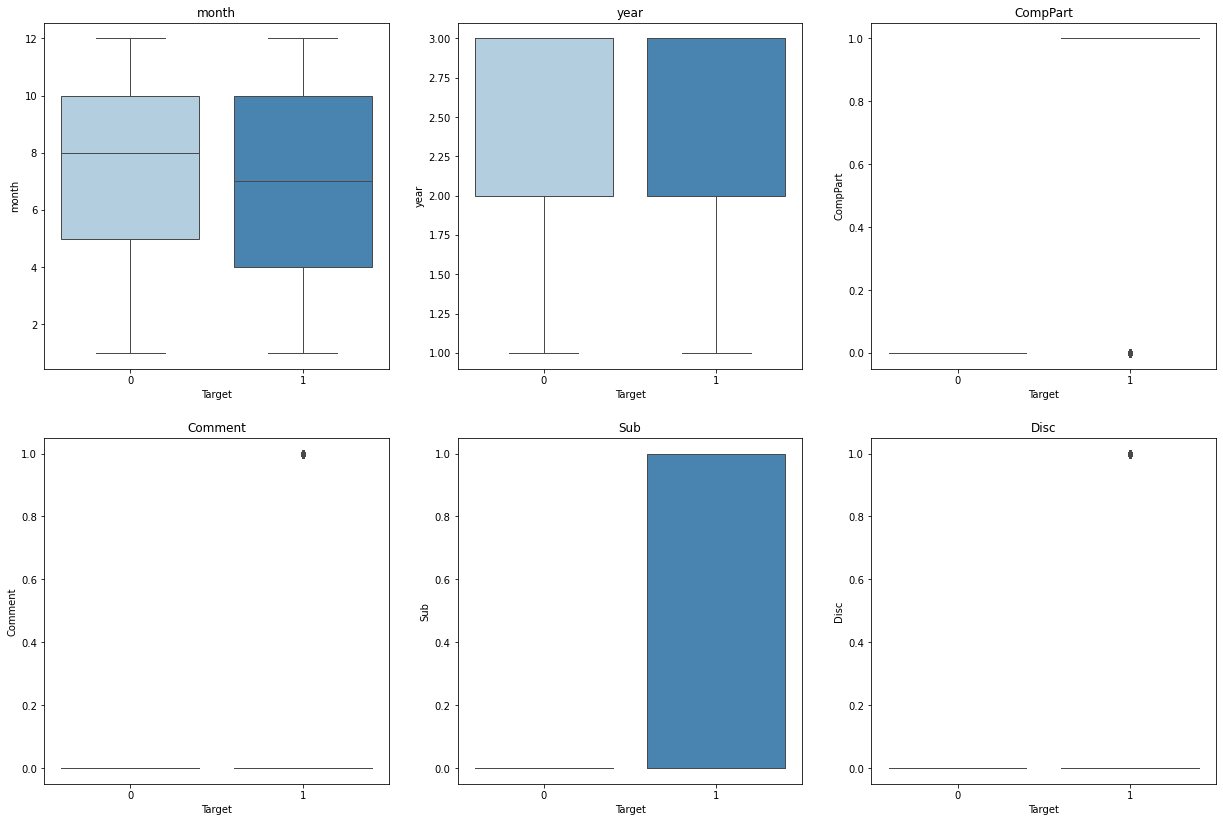

In [37]:
plotly("Target", ["month","year","CompPart","Comment","Sub","Disc"], df)

In [38]:
# Generate a function to depict 'plotly' of features
def count_of_plot(x, y, df):
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i,j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df[[x,j]], linewidth=0.4, edgecolor = 'Black', alpha = 0.8, palette="Blues")
        ax.set_title(j)
        
    return plt.show()

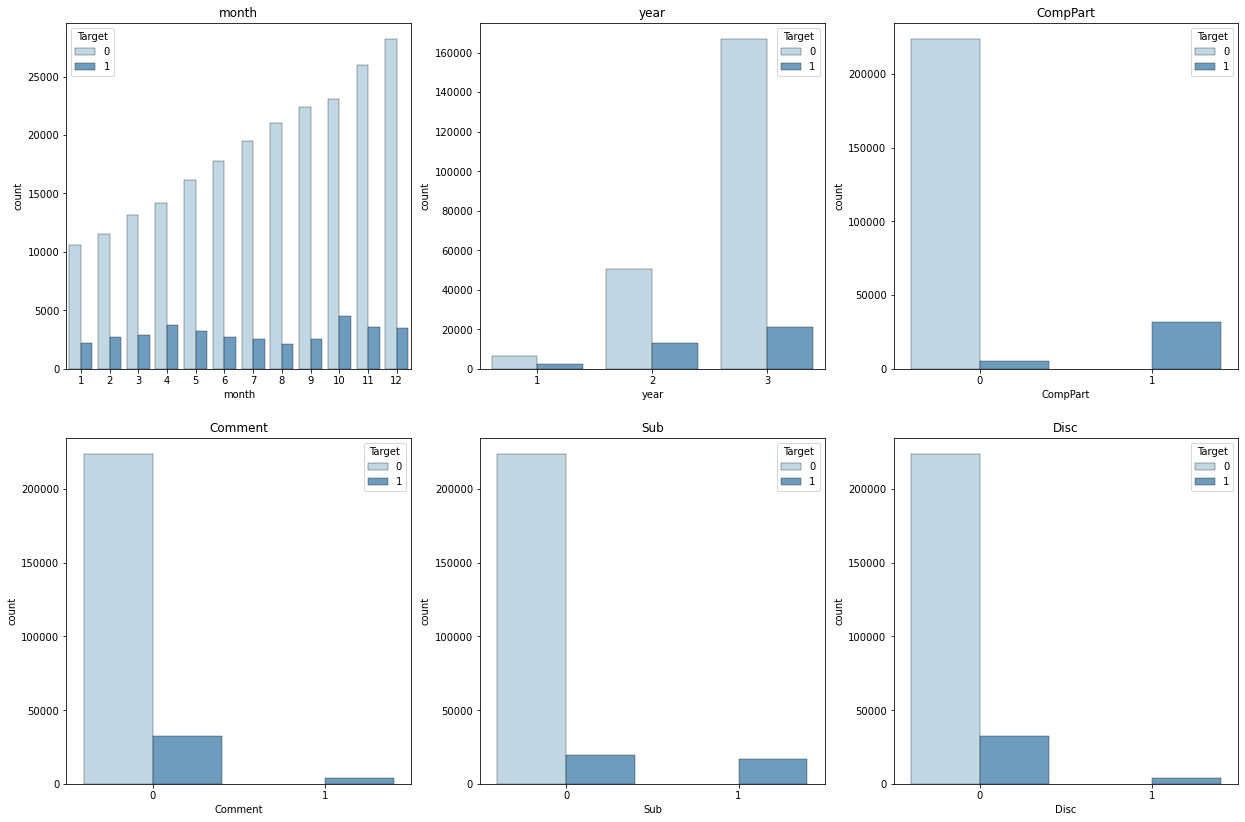

In [39]:
count_of_plot("Target", ["month","year","CompPart","Comment","Sub","Disc"], df)

In [40]:
df.dtypes
df_all.dtypes


CommentDate Year               float64
CommentDate Month              float64
CommentDate Day_of_week        float64
PublicRank                     float64
Successful Submission Count    float64
CompPartCreated Year           float64
CompPartCreated Month          float64
CompPartCreated Day_of_week    float64
Kind                           float64
SecretCode                     float64
CompEndTime Month              float64
CompEndTime Day_of_week        float64
CompStartTime Month            float64
CompStartTime Day_of_week      float64
DiscDate Month                 float64
DiscDate Day_of_week           float64
SubDate Month                  float64
SubDate Day_of_week            float64
FeatureC                       float64
Points Reward                  float64
SubmissionLimitPerDay          float64
t_output                         int32
dtype: object

In [41]:
df_all.info()

df_all.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15193 entries, 0 to 15192
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CommentDate Year             15193 non-null  float64
 1   CommentDate Month            15193 non-null  float64
 2   CommentDate Day_of_week      15193 non-null  float64
 3   PublicRank                   3660 non-null   float64
 4   Successful Submission Count  4167 non-null   float64
 5   CompPartCreated Year         15193 non-null  float64
 6   CompPartCreated Month        15193 non-null  float64
 7   CompPartCreated Day_of_week  15193 non-null  float64
 8   Kind                         15193 non-null  float64
 9   SecretCode                   15193 non-null  float64
 10  CompEndTime Month            15193 non-null  float64
 11  CompEndTime Day_of_week      15193 non-null  float64
 12  CompStartTime Month          15193 non-null  float64
 13  CompStartTime Da

CommentDate Year                   0
CommentDate Month                  0
CommentDate Day_of_week            0
PublicRank                     11533
Successful Submission Count    11026
CompPartCreated Year               0
CompPartCreated Month              0
CompPartCreated Day_of_week        0
Kind                               0
SecretCode                         0
CompEndTime Month                  0
CompEndTime Day_of_week            0
CompStartTime Month                0
CompStartTime Day_of_week          0
DiscDate Month                     0
DiscDate Day_of_week               0
SubDate Month                      0
SubDate Day_of_week                0
FeatureC                           0
Points Reward                      0
SubmissionLimitPerDay              0
t_output                           0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

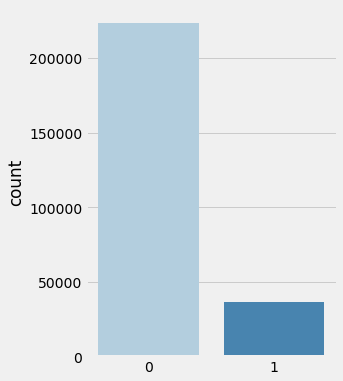

In [42]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(4, 6))
ax = sns.countplot(x=ytr_train, palette="Blues", linewidth=1)
plt.show


In [43]:
# X_test = X_test.reshape(-1,1)

<AxesSubplot:>

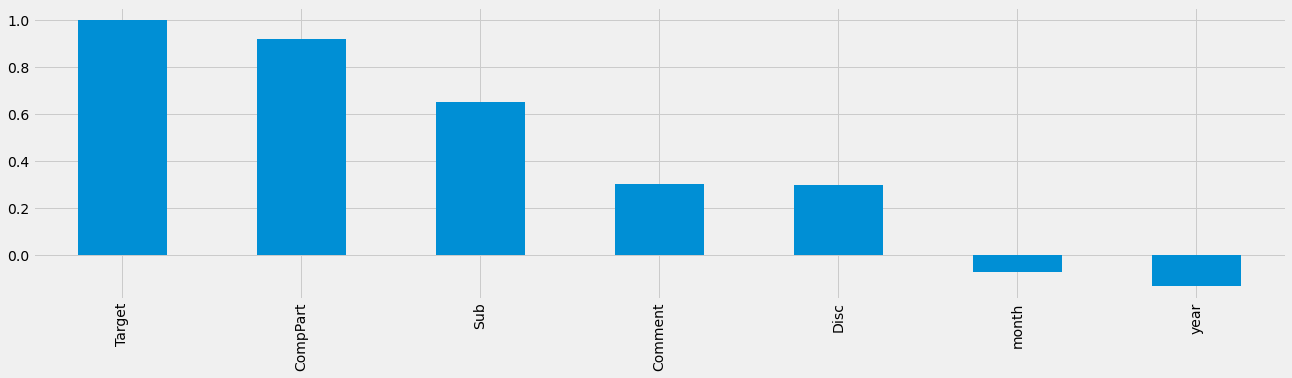

In [44]:

plt.figure(figsize=(16,10))
df.corr()['Target'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

In [45]:
# Step 4: Feature  Engineering
# OHE, LE, 

In [60]:
# df_test.describe()

df_test.head()

,User_ID,month,year,target
0,ID_H1ELY25E,1,4,NaN
1,ID_H1ELY25E,2,4,NaN
2,ID_H1ELY25E,3,4,NaN
3,ID_463Q2BCO,1,4,NaN
4,ID_463Q2BCO,2,4,NaN


In [62]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15193 entries, 0 to 15192
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   CommentDate Year             15193 non-null  float64       
 1   CommentDate Month            15193 non-null  float64       
 2   CommentDate Day_of_week      15193 non-null  float64       
 3   PublicRank                   3660 non-null   float64       
 4   Successful Submission Count  4167 non-null   float64       
 5   CompPartCreated Year         15193 non-null  float64       
 6   CompPartCreated Month        15193 non-null  float64       
 7   CompPartCreated Day_of_week  15193 non-null  float64       
 8   Kind                         15193 non-null  float64       
 9   SecretCode                   15193 non-null  float64       
 10  CompEndTime Month            15193 non-null  float64       
 11  CompEndTime Day_of_week      15193 non-nu

In [47]:
df_all['CompStartTime Day_of_week'] = pd.to_datetime(df_all['CompStartTime Day_of_week'], format= '%Y-%m-%dT%H:%M:%SZ', errors = 'coerce')

In [48]:
# Shuffle the sample

df_all = df_all.sample(n=len(df_all), random_state=42)
df_all = df_all.reset_index(drop=True)

#Split the data

df_valid = df_all.sample(frac=0.3, random_state=42)
df_train = df_all.drop(df_valid.index)

In [49]:
# Check prevalence for the two data sample

print('Train Sample (n = %d): %.3f'%(len(df_train), d_prevalence(df_train.t_output.values)))
print('Valid Sample (n = %d): %.3f'%(len(df_valid), d_prevalence(df_valid.t_output.values)))

Train Sample (n = 10635): 0.839
Valid Sample (n = 4558): 0.839


In [51]:
# Step 5: Splitting

# from sklearn.model_selection import train_test_split

# y = df_all['t_output'].values
# X = df_all.drop('t_output', axis=1)
# X = X.values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

# Feature combination

features = ['CommentDate Year', 'CommentDate Day_of_week', 'CommentDate Month', 'CommentDate Day_of_week', 'PublicRank', 
            'Successful Submission Count', 'CompPartCreated Year', 'CompPartCreated Month', 'CompPartCreated Day_of_week', 
            'Kind', 'SecretCode','CompEndTime Month','CompEndTime Day_of_week','CompStartTime Month', 'CompStartTime Day_of_week', 
            'DiscDate Month','DiscDate Day_of_week','SubDate Month','SubDate Day_of_week','FeatureC',
            'Points Reward','SubmissionLimitPerDay','t_output']

X_train = df_train[features].values
y_train = df_train['t_output'].values

X_test = df_valid[features].values
y_train = df_valid['t_output'].values

In [52]:
# df_train.info()

In [53]:
# Checking the shape of data

print('Training shape:', X_train.shape, y_train.shape)
print('Validation shape:', X_train.shape, y_train.shape)

Training shape: (10635, 23) (4558,)
Validation shape: (10635, 23) (4558,)


In [ ]:
#1 categories 

categories = np.union1d(train, test)

train = train.astype('category', categories = categories)
test = test.astype('category', categories = categories)

pd.get_dummies(train)
pd.get_dummies(test)

#2 train.apply(lambda x: x.astype('category', categories = categories), axis =0)

#3 pd.get_dummies(cat.astype(pd.CategoricalDtype(categories=categories)))

#4 possible_categories = list('abc'); cat = pd.Series(list('aba')); 
# cat = cat.astype(pd.CategoricalDtype(categories=possible_categories)); pd.get_dummies(cat)

#5 df['col'] = pd.Categorical(df['col'], categories=['a', 'b', 'c', 'd']; pd.get_dummies()



In [ ]:
"""
df = pd.read_csv('dataset_that_i_want_to_predict.csv')
model = pickle.load(open("model_trained.sav", 'rb'))

# I have an 'example_df' containing just 1 row of training data (this is exactly what the model needs)
example_df = pd.read_csv('reading_one_row_of_trainings_data.csv')

# Checking for missing columns, and adding that to the new dataset 
missing_cols = set(example_df.columns) - set(df.columns)
for column in missing_cols:
    df[column] = 0 #adding the missing columns, with 0 values (Which is ok. since everything is dummy)

# make sure that we have the same order 
df = df[example_df.columns] 

# The prediction will lead to an error!
results = model.predict(df)

2.

# Get missing columns in the training test
missing_cols = set( train.columns ) - set( test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test = test[train.columns]
# train, test = train.align(test, axis=1)

"""

In [54]:
import sklearn

In [63]:
# Step 6: This shows our evaluation metrics for the chosen model

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score, plot_confusion_matrix

# We setup a function to display feature weights of classifiers
def we_feat(x_frame, classifier, classifier_name):
    w = pd.Series(classifier.coef[0], index=x_frame.columns.values).sort_values(ascending=False)
    
    topoff = w[:10]
    plt.fig(figsize=(6,4))
    plt.tick_params(label_size=10)
    plt.title(f'{classifier_name} - top 10 weight features')
    topoff.plot(kind='bar')
    
    bottom = w[:,10]
    plt.fig(figsize=(6,4))
    plt.tick_params(label_size=10)
    plt.title(f'{classifier_name} -bottom 10 features')
    bottom.plot(kind='bar')
    
    return print("")

def confuse_plot(y_test, X_test, y_train, X_train, y_pred, classifier, classifier_name):
    # We define plots for the confusion matrix and accuracy score
    
    fig,ax = plt.subplot(7,6)
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["Non-Active", "Active"], 
                          normalize=None, ax=ax, cmp=plt.cm.blues)
    ax.set_title(f'{classifier_name} - Confussion matix plot')
    plt.show()
    
    fig,ax = plt.subplot(7,6)
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["Non-Active", "Active"], 
                          normalize=True, ax=ax, cmp=plt.cm.blues)
    ax.set_title(f'{classifier_name} - Confussion matix plot(norm)')
    plt.show()
    
    print(f'Accuracy score test:{accuracy_score(y_test, y_pred)}')
    print(f'Accuracy score train: {classifier.score(y_train, X_train)} - (Comparing the training performance)' )
    return print(" ")

def rocurve_auscore(X_test, y_test, classifier, y_ped_probabilities):
    # We now display plots for roc, auc, recall metrics
    
    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC')
    plt.show()
    return print(f'AUC Score(ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

def scores_prcurve(classifier_name, y_test, y_pred, y_pred_probabilities):
    # we will further display the metrics for preci_recall_curve and other scores
    
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds =  precision_recall_curve(y_test, y_pred_prob)
    
    plt.plot(recall, precision, "Precision Recall Curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - PR Curve')
    pl.show()
    
    f1, auc_score = f1_score(y_test, y_pred), auc(recall, precision)
    return print(f'F1_score_result: {f1} \n AUC Score (ROC): {auc_score}\n')
    
    
    

In [64]:
# Step 7: Model selection, Training, Prediction and Assessment
from sklearn.ensemble import RandomForestClassifier

# Instantiate, train the model, make predictions and evaluate chosen metric
def model(X_test , y_test, y_train):
    # Instantiating the classifier...
    rf=RandomForestClassifier(max_depth = 5, n_estimators=100, random_state = 42)
    rf.fit(X_train, y_train)
    
    # Making class prediction with associated probability
    y_pred = rf.predict(X_test)
    y_pred_prob = rf.predict_proba(X_test)
    
    # plot model evaluations
    scores_prcurve(classifier_name = rf().__class__.__name__, y_test =y_t, y_pred=y_pred, y_pred_prob=y_pred_prob)
    rocurve_auscore(X_t, y_t, classifier = rf().__class__.__name__, y_pred_prob =y_ped_prob)
    confuse_plot(y_t, X_t, y_train, X_train, y_pred, classifier = rf, classifier_name = rf().__class__.__name__)

# y_train_preds = rf.predict_proba(X_test[:,1])
# y_valid_preds = rf.predict_proba(X_valid)[:,1]
# y_train_preds

# y_valid_preds = rf.predict_proba([X_test])

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
rf_param_grid = {'n_estimators': np.arange(10, 2000, 10),
                'max_features': ['auto', 'sqrt'],
                'max_depth': np.arange(10, 200, 10),
                'criterion': ['gini', 'entropy'],
                'bootstrap': [True, False]
                }

rf = RandomForestClassifier()

rf_grid = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid, cv=5, verbose=0)

rf_grid.fit(X_train, y_train)

# Predictions 

y_pred_tunedrf = rf_grid.predict(X_test)
y_pred_prob = rf_grid.predict_proba(X_test)

print('Best tuned parameters - Random Forest:', rf_grid.best_params_)




ValueError: Found input variables with inconsistent numbers of samples: [10635, 4558]

In [304]:
from pykliep import DensityRatioEstimator

In [307]:

# kliep = DensityRatioEstimator()
# kliep.fit(X_train, X_t) # keyword arguments are X_train and X_test
# weights = kliep.predict(X_train)

# rf = RandomForestRegressor()
# rf.fit(X_train, y_train, sample_weight=weights) # Train using the sample weights!

In [308]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [309]:
tf.__version__

'2.7.0'

In [387]:
# Test dataset

df_test = pd.read_csv('.\zindi\Test.csv')

df_test['Target'] = df['Target'].astype('int')

In [ ]:
X = df_test.drop('User_ID', axis=1)
X_t = X.values
df_test['Target'] = df['Target'].astype('int')
y_t = df_test['Target'].values

In [388]:
df_test = df_test.values
X = df_test[:,1:-1]
y = df_test[:,-1]
# y = df_test['Target'].values
print(X, y.T)
print(type(X), type(y))

[[1 4]
 [2 4]
 [3 4]
 ...
 [3 4]
 [3 4]
 [3 4]] [0 0 0 ... 0 0 0]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [360]:
# Training dataset
useful = ['month','year','CompPart','Comment','Sub','Disc','Target']
df = pd.read_csv('.\zindi\Train.csv')
X = df[useful].values
# X = df.drop('Target', axis=1)
# X_train = features.values
# Xtr_train = X.values
y = df['Target']
y = y.values
# y_train = target.values


# To split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=1)


In [276]:
# Xtr_train = Xtr_train.drop('User_ID', axis = 1)

# X_train = np.asarray(Xtr_train).astype(np.float32)

# df.info()

In [389]:
from sklearn.neighbors import KNeighborsClassifier

# We approach our setup by implementing a K-neighbour classifier for training our dataset
knn = KNeighborsClassifier()

knn.fit(X, y)

nb_ix = knn.kneighbors(X, 2, return_distance=False)
 
# We can now fit the model
# knn.fit(X_train, y_train)

ix = nb_ix[:,0]

ValueError: Unknown label type: 'unknown'

In [329]:
ix = np.unique(ix)

print(ix)

[  354  2513 31708]


In [322]:
X_tr, y_tr = X_train[ix], y_train[ix]

In [66]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_tr.shape, y_tr.shape)

(10635, 23) (4558,)


NameError: name 'y_test' is not defined

In [326]:
# yhat = knn.predict(X_tr)
# y_class = knn.predict_classes(X_test)

In [280]:
len(yhat)
accu = accuracy_score(y_test, yhat)
print('This is the accuracy in percentage: %.3f'%(accu*100))

This is the accuracy in percentage: 100.000


In [284]:
knn1 = KNeighborsClassifier()
knn1.fit(X_tr, y_tr)
y_trhat = knn1.predict(X_test)
accuracy = accuracy_score(y_test, y_trhat)
print('accuracy: %.3f'%accuracy)

accuracy: 1.000


In [208]:
# Build TF NN, batch_size = 30, epoch=100

nn = tf.keras.models.Sequential()
input = X_train.shape[1]

nn.add(Dense(1024, input_shape = (input,), activation ='relu'))
nn.add(Dropout(0.2))
nn.add(Dense(1024, activation = 'relu'))
nn.add(Dropout(0.2))
nn.add(Dense(1, activation ='sigmoid'))
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
nn.summary()

mc = ModelCheckpoint('model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 0, save_best_only = True)

# to split dataset

to_fit_nn = nn.fit(X_train, y_train, epochs =10, 
                   validation_data = (X_train, y_train), batch_size = 100, callbacks = [mc])

best = load_model('model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              8192      
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 1,058,817
Trainable params: 1,058,817
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2599/2599 [========================

In [216]:
accuracy = best.evaluate(X_train, y_train, verbose=False)
print("Best model training score: {:.4f}".format(accuracy[0]))
print("Best model training score: {:.4f}".format(accuracy[1]))

accuracy = best.evaluate(X_test, y_test, verbose=False)
print("Best model training score: {:.4f}".format(accuracy[0]))
print("Best model training score: {:.4f}".format(accuracy[1]))
print("------------------------------------------------------>")

accuracy = nn.evaluate(X_train, y_train, verbose=False)
print("Final model training score: {:.4f}".format(accuracy[0]))
print("Final model training score: {:.4f}".format(accuracy[1]))

accuracy = nn.evaluate(X_test, y_test, verbose=False)
print("Final model training score: {:.4f}".format(accuracy[0]))
print("Final model training score: {:.4f}".format(accuracy[1]))

Best model training score: 0.0000
Best model training score: 1.0000


ValueError: in user code:

    File "C:\Users\AGU\anaconda3\lib\site-packages\keras\engine\training.py", line 1366, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\AGU\anaconda3\lib\site-packages\keras\engine\training.py", line 1356, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\AGU\anaconda3\lib\site-packages\keras\engine\training.py", line 1349, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\AGU\anaconda3\lib\site-packages\keras\engine\training.py", line 1303, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\AGU\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\AGU\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 7), found shape=(None, 2)


In [ ]:
def history_of_plot(fitting):
    bin = fitting.history['accuracy']
    valbin = fitting.evaluate['val_accuracy']
    lossy = fitting.history['loss']
    vallossy = fitting.evaluate['val_loss']
    x = range(1, len(bin) + 1)
    
    plt.figure(figsize=(14,7))
    plt.subplot(1,2,1)
    plt.plot(x, bin, 'b', label='Training Accuracy')
    plt.plot(x, valbin, 'r', label='Testing Accuracy')
    plt.title('Training and testing Accuracy')
    plt.legend()
    
    plt.figure(figsize=(14,7))
    plt.subplot(1,2,2)
    plt.plot(x, lossy, 'b', label='Training loss')
    plt.plot(x, vallossy, 'r', label='Testing loss')
    plt.title('Training and testing Loss')
    plt.legend()

In [ ]:
history_of_plot(to_fit_nn)

In [ ]:
# Making predictions based on classes and probabilities
y_prednn = best.predict(X_test)
y_prednn_prob = best.predict_proba(X_test)
y_classes_prednn = best.predict_classes(X_test)

#1d array
y_prednn_1 = y_prednn[:,0]
y_classes_prednn_1 = y_classes_prednn[:,0]

In [ ]:
# Print Network evaluation metrics
nn_confuse = confusion_matrix(y_test, y_classes_prednn_1)
print(f'Confusion matrix for our network:\n{nn_confuse}')
print(---------------------------------------------------)

nn_accuracy = accuracy_score(y_test, y_classes_prednn_1)
print('The Accuracy score: %f' % nn_accuracy)
print(---------------------------------------------------)

auc_nn = roc_auc_score(y_test, y_classes_prednn_1)
print('ROC AUC: %f' %roc_auc_nn)
print(---------------------------------------------------)

precision_nn = precision_score(y_test, y_classes_prednn_1)
print('Precision %f' %precision_nn)
print(---------------------------------------------------)

f1_nn = f1_score(y_test, y_classes_prednn_1)
print('F1 score result %f' %f1_nn)
print(---------------------------------------------------)

recall_nn = recall_score(y_test, y_classes_prednn_1)
print('The Recall score: %f' % recall_nn)
